# Exploratory Data Analysis (EDA)

This notebook follows the **CRISP-DM** (Cross-Industry Standard Process for Data Mining) methodology, focusing on three key phases:

1. **Data Understanding** - Inspect and explore the dataset
2. **Data Preparation** - Clean and transform data for analysis
3. **Data Modeling** - Perform basic analysis and identify patterns

We'll work with machining process data from CNC operations.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization defaults
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

---

## 1. Data Understanding

**Goal**: Inspect the dataset to understand its structure, content, and quality.

In this phase, we'll answer:
- What is the shape and size of the data?
- What types of variables do we have?
- What are the distributions of our variables?
- Are there any data quality issues?

### 1.1 DataFrame Overview

In [92]:
# Load the dataset
df = pd.read_csv('../data/external/machining_data_raw.csv')

print("First look at the data:")
df.head()

First look at the data:


,run_id,machine_id,material,tool_type,cutting_speed_m_min,feed_rate_mm_rev,depth_of_cut_mm,surface_finish_ra,tool_wear_mm,cycle_time_sec,operator,temperature_C
0,R001,CNC01,Steel,Carbide,120,0.15,2.0,1.2,0.12,45,Smith,22.5
1,R002,CNC01,Aluminum,Carbide,250,0.20,2.5,0.8,0.08,38,Smith,23.1
2,R003,CNC02,steel,HSS,80,0.12,1.5,1.8,0.15,52,Johnson,24.2
3,R004,CNC02,Aluminum,HSS,200,0.18,2.0,1.0,0.10,41,Johnson,NaN
4,R005,CNC03,Steel,Ceramic,180,0.14,2.2,1.0,0.09,42,Chen,25.8


In [93]:
# Check the last few rows
df.tail()

,run_id,machine_id,material,tool_type,cutting_speed_m_min,feed_rate_mm_rev,depth_of_cut_mm,surface_finish_ra,tool_wear_mm,cycle_time_sec,operator,temperature_C
59,R059,CNC03,Steel,Ceramic,179,0.15,2.2,1.0,0.09,42,Johnson,28.1
60,R060,CNC03,Aluminum,Ceramic,296,0.23,2.8,0.8,0.07,36,Johnson,28.5
61,R061,CNC01,Steel,Carbide,350,0.16,2.0,1.3,0.13,46,Chen,23.1
62,R062,CNC02,Steel,HSS,75,0.12,1.5,1.8,0.35,52,Martinez,25.0
63,R063,CNC01,Aluminum,Carbide,252,0.21,2.6,0.8,0.08,39,Johnson,23.8


In [94]:
# Dataset dimensions
print(f"Dataset shape: {df.shape}")
print(f"Number of rows (observations): {df.shape[0]}")
print(f"Number of columns (features): {df.shape[1]}")

Dataset shape: (64, 12)
Number of rows (observations): 64
Number of columns (features): 12


In [95]:
# Column names
print("Column names:")
print(df.columns.tolist())

Column names:
['run_id', 'machine_id', 'material', 'tool_type', 'cutting_speed_m_min', 'feed_rate_mm_rev', 'depth_of_cut_mm', 'surface_finish_ra', 'tool_wear_mm', 'cycle_time_sec', 'operator', 'temperature_C']


In [96]:
# Data types
print("Data types per column:")
df.dtypes

Data types per column:


run_id                  object
machine_id              object
material                object
tool_type               object
cutting_speed_m_min      int64
feed_rate_mm_rev       float64
depth_of_cut_mm        float64
surface_finish_ra      float64
tool_wear_mm           float64
cycle_time_sec           int64
operator                object
temperature_C          float64
dtype: object

In [97]:
# Comprehensive information
print("Detailed DataFrame information:")
df.info()

Detailed DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   run_id               64 non-null     object 
 1   machine_id           64 non-null     object 
 2   material             64 non-null     object 
 3   tool_type            64 non-null     object 
 4   cutting_speed_m_min  64 non-null     int64  
 5   feed_rate_mm_rev     64 non-null     float64
 6   depth_of_cut_mm      64 non-null     float64
 7   surface_finish_ra    61 non-null     float64
 8   tool_wear_mm         61 non-null     float64
 9   cycle_time_sec       64 non-null     int64  
 10  operator             64 non-null     object 
 11  temperature_C        59 non-null     float64
dtypes: float64(5), int64(2), object(5)
memory usage: 6.1+ KB


**Observations from `.info()`**:
- We can see which columns have missing values (Non-Null Count < total rows)
- Data types help us identify numerical vs categorical variables
- Memory usage gives us an idea of dataset size

In [98]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

if df.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values('run_id'))

Number of duplicate rows: 1

Duplicate rows:
   run_id machine_id  material tool_type  cutting_speed_m_min  \
19   R020      CNC01  Aluminum   Carbide                  252   
20   R020      CNC01  Aluminum   Carbide                  252   

    feed_rate_mm_rev  depth_of_cut_mm  surface_finish_ra  tool_wear_mm  \
19              0.21              2.6                0.8          0.08   
20              0.21              2.6                0.8          0.08   

    cycle_time_sec operator  temperature_C  
19              39  Johnson           23.8  
20              39  Johnson           23.8  


### 1.2 Numerical Variables Inspection

In [99]:
# Statistical summary of numerical variables
print("Statistical summary:")
df.describe()

Statistical summary:


,cutting_speed_m_min,feed_rate_mm_rev,depth_of_cut_mm,surface_finish_ra,tool_wear_mm,cycle_time_sec,temperature_C
count,64.00,64.00,64.00,61.00,61.00,64.00,59.00
mean,191.17,0.17,2.17,1.17,0.11,43.00,25.25
std,75.77,0.04,0.41,0.38,0.04,5.41,1.74
min,75.00,0.11,1.40,0.60,0.05,34.00,22.40
25%,121.50,0.14,2.00,0.90,0.08,39.00,23.75
50%,198.50,0.17,2.10,1.10,0.10,42.00,25.30
75%,252.00,0.21,2.52,1.30,0.13,46.00,26.60
max,350.00,0.24,2.90,2.10,0.35,55.00,28.50


**Key statistics to examine**:
- **count**: How many non-null values (helps identify missing data)
- **mean vs median (50%)**: Large difference suggests skewed distribution
- **std**: High standard deviation indicates high variability
- **min/max**: Check for unrealistic values or outliers

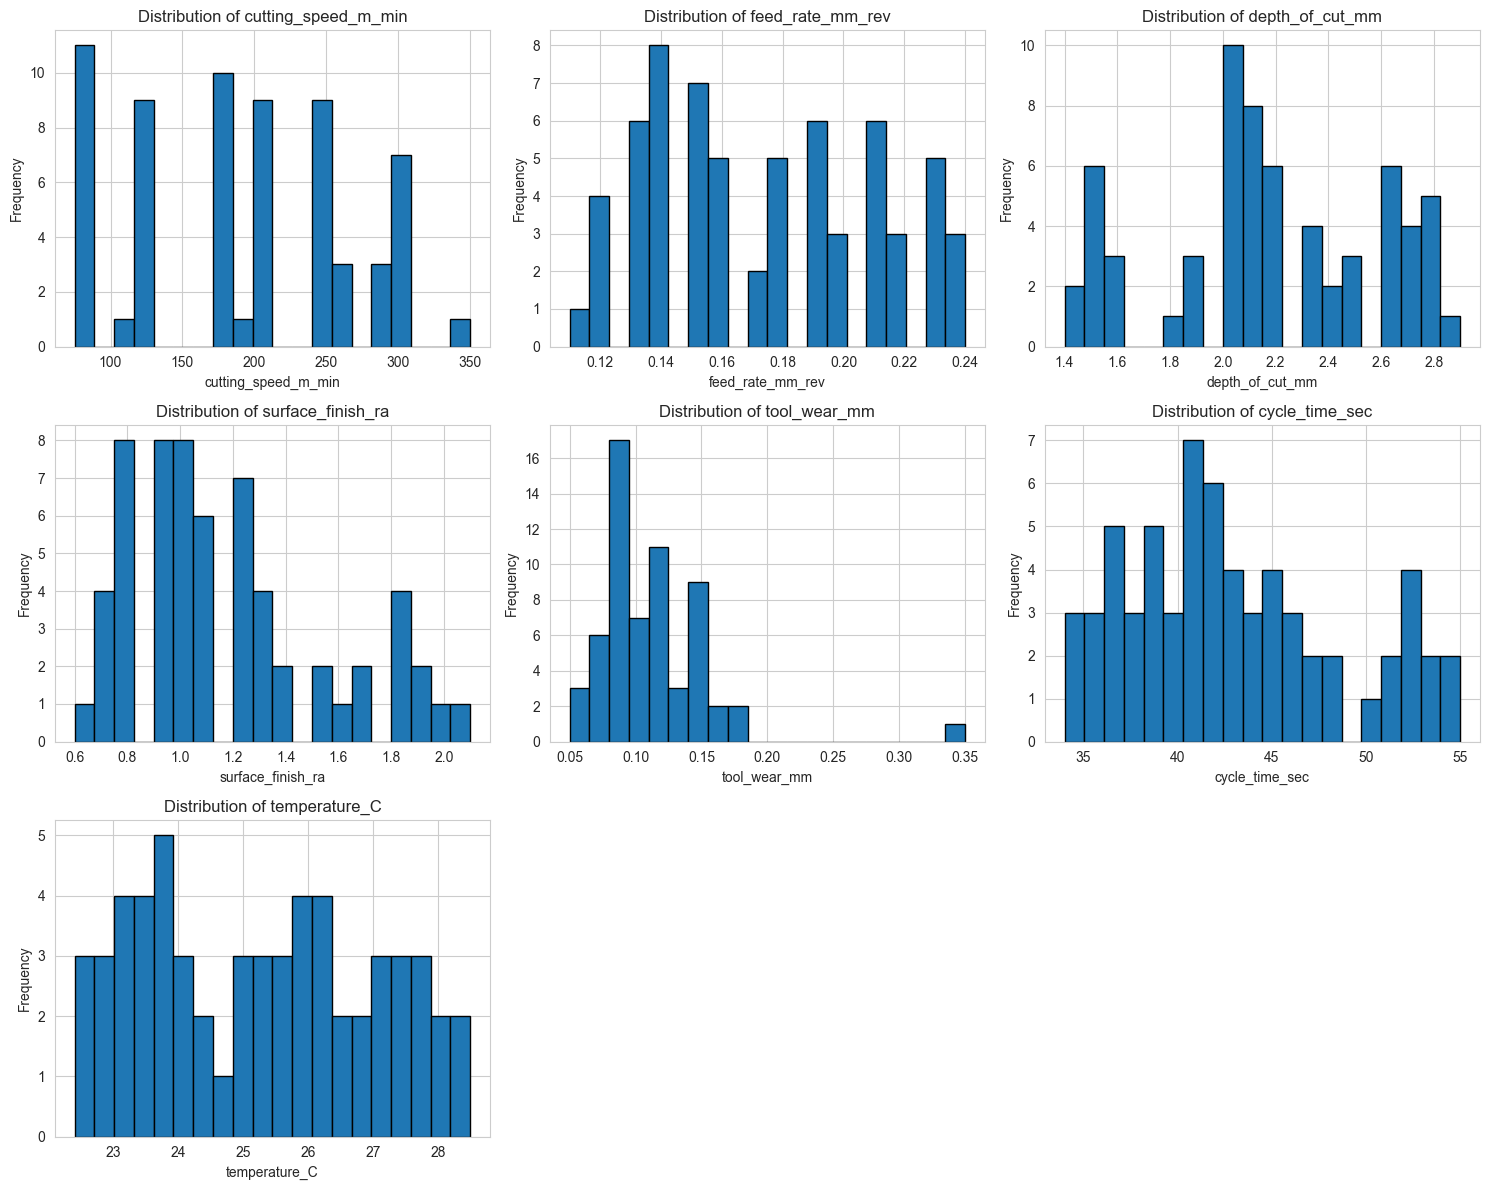

In [100]:
# Visualize distributions with histograms
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df[col].hist(bins=20, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

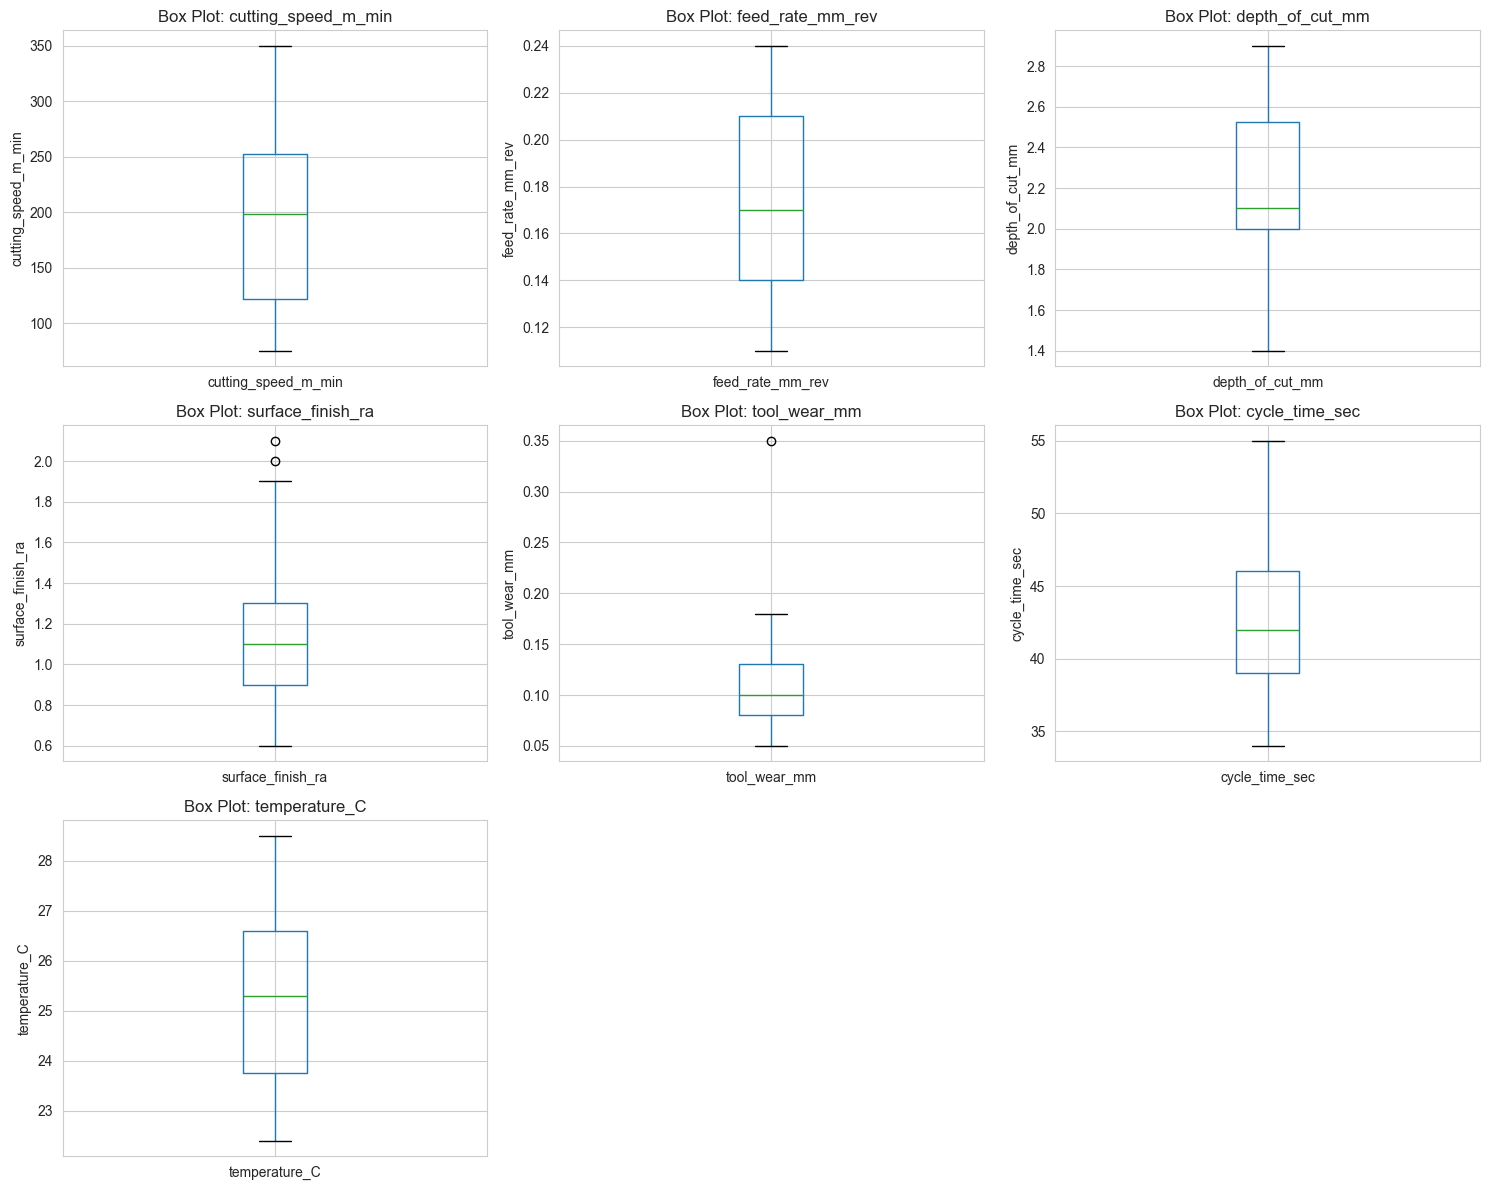

In [101]:
# Box plots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot: {col}')
        axes[idx].set_ylabel(col)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

**Interpreting box plots**:
- Points beyond the whiskers are potential outliers
- Box shows interquartile range (IQR: 25th to 75th percentile)
- Line in box is the median

### 1.3 Categorical Variables Inspection

In [102]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['run_id', 'machine_id', 'material', 'tool_type', 'operator']


In [103]:
# Count unique values in each categorical column
print("Number of unique values per categorical column:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Number of unique values per categorical column:
run_id: 63 unique values
machine_id: 3 unique values
material: 6 unique values
tool_type: 3 unique values
operator: 4 unique values


In [104]:
# Value counts for each categorical variable
for col in categorical_cols:
    print(f"\n{'='*50}")
    print(f"Value counts for: {col}")
    print(f"{'='*50}")
    print(df[col].value_counts())
    print(f"\nPercentages:")
    print(df[col].value_counts(normalize=True).mul(100).round(2))


Value counts for: run_id
run_id
R020    2
R001    1
R033    1
R035    1
R036    1
       ..
R027    1
R028    1
R029    1
R030    1
R063    1
Name: count, Length: 63, dtype: int64

Percentages:
run_id
R020    3.12
R001    1.56
R033    1.56
R035    1.56
R036    1.56
        ... 
R027    1.56
R028    1.56
R029    1.56
R030    1.56
R063    1.56
Name: proportion, Length: 63, dtype: float64

Value counts for: machine_id
machine_id
CNC01    23
CNC02    21
CNC03    20
Name: count, dtype: int64

Percentages:
machine_id
CNC01    35.94
CNC02    32.81
CNC03    31.25
Name: proportion, dtype: float64

Value counts for: material
material
Aluminum    28
Steel       25
steel        4
aluminum     4
 Steel       2
 Steel       1
Name: count, dtype: int64

Percentages:
material
Aluminum    43.75
Steel       39.06
steel        6.25
aluminum     6.25
 Steel       3.12
 Steel       1.56
Name: proportion, dtype: float64

Value counts for: tool_type
tool_type
Carbide    23
HSS        21
Ceramic    20
Name: 

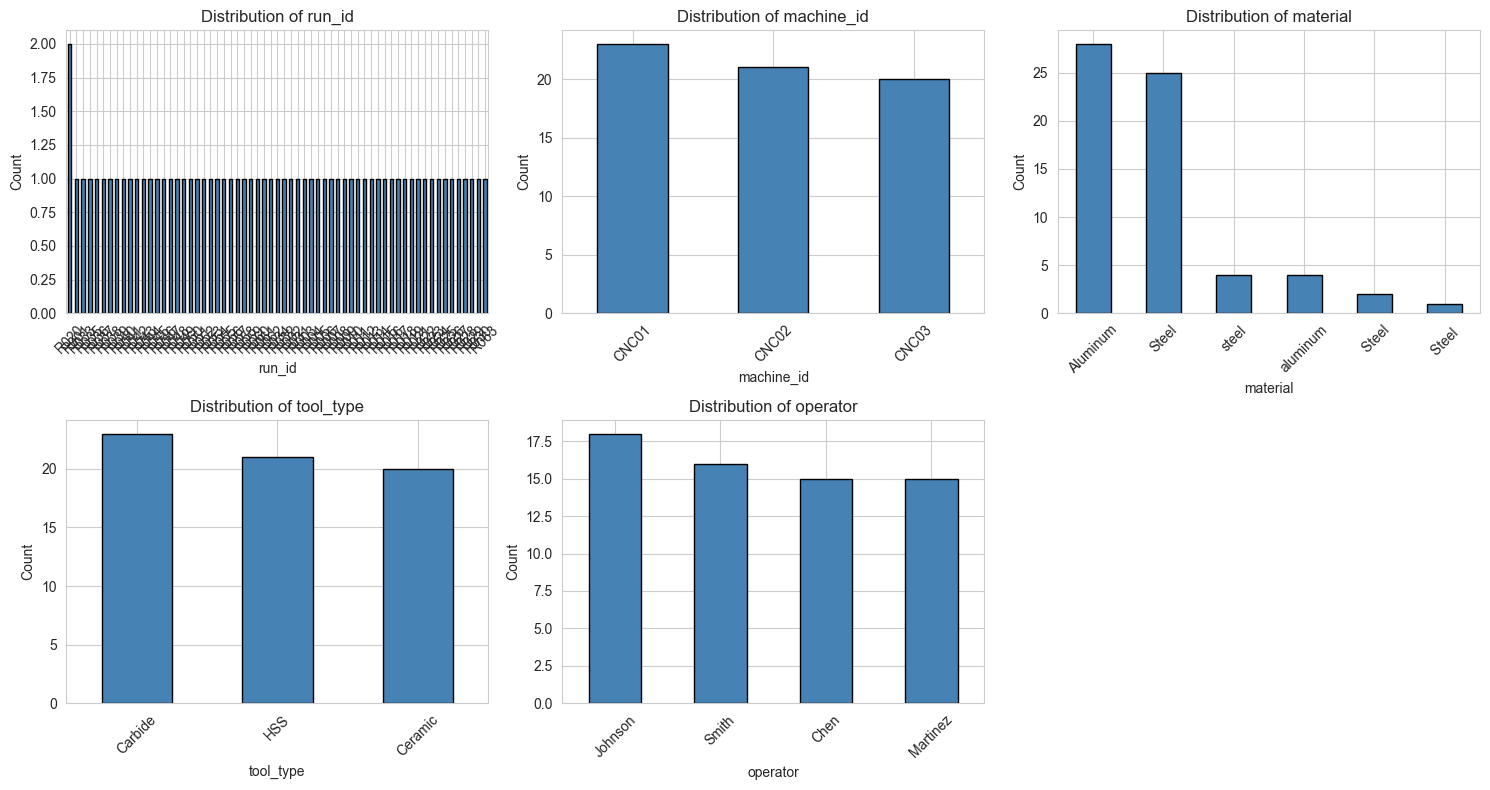

In [105]:
# Visualize categorical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[idx], color='steelblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [106]:
# Cross-tabulation: Relationship between categorical variables
print("Cross-tabulation: Material vs Tool Type")
crosstab = pd.crosstab(df['material'], df['tool_type'], margins=True)
print(crosstab)

Cross-tabulation: Material vs Tool Type
tool_type  Carbide  Ceramic  HSS  All
material                             
 Steel           0        2    0    2
 Steel           0        0    1    1
Aluminum        10        8   10   28
Steel           11        7    7   25
aluminum         2        2    0    4
steel            0        1    3    4
All             23       20   21   64


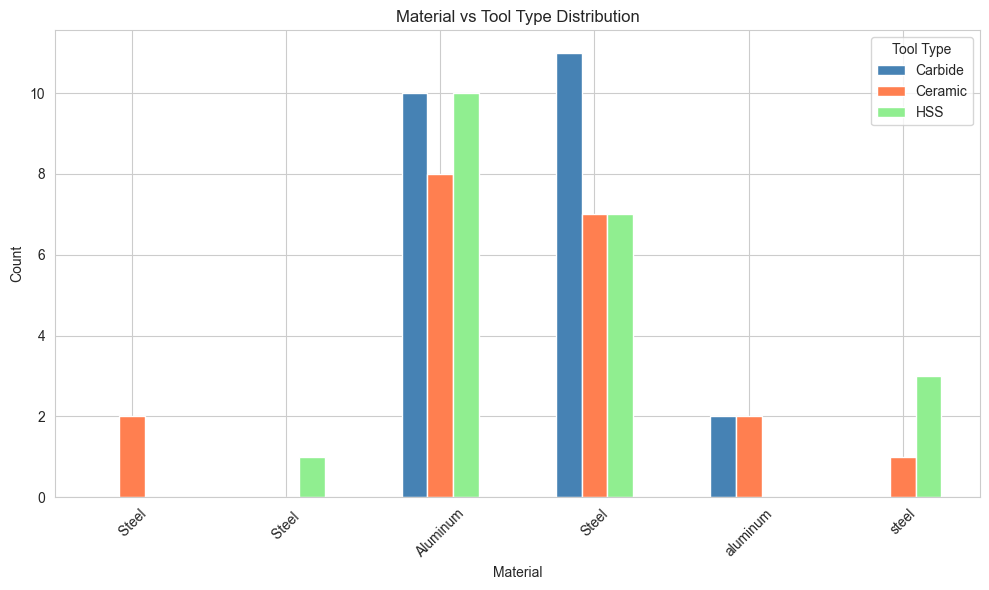

In [107]:
# Visualize cross-tabulation
pd.crosstab(df['material'], df['tool_type']).plot(kind='bar', figsize=(10, 6), 
                                                    color=['steelblue', 'coral', 'lightgreen'])
plt.title('Material vs Tool Type Distribution')
plt.xlabel('Material')
plt.ylabel('Count')
plt.legend(title='Tool Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.4 Data Understanding Summary

**Key Findings**:
- Dataset size and structure
- Presence of missing values
- Presence of duplicate rows
- Distribution patterns in numerical variables
- Potential outliers identified
- Category distributions and relationships
- Data quality issues (inconsistent categorical values, etc.)

---

## 2. Data Preparation

**Goal**: Clean and transform the data to make it ready for analysis.

In this phase, we'll:
- Handle missing values
- Handle outliers
- Clean inconsistent data
- Engineer new features

### 2.1 Handling Missing Values

We have **three main strategies** for dealing with missing values:

1. **Complete removal** - Remove all rows with any missing values
2. **Threshold-based removal** - Remove columns with too many missing values
3. **Imputation** - Fill missing values with estimates (mean, median, mode, etc.)

In [108]:
# Check missing values
print("Missing values per column:")
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})

print(missing_df[missing_df['Missing Count'] > 0])

Missing values per column:
                   Missing Count  Percentage
surface_finish_ra              3        4.69
tool_wear_mm                   3        4.69
temperature_C                  5        7.81


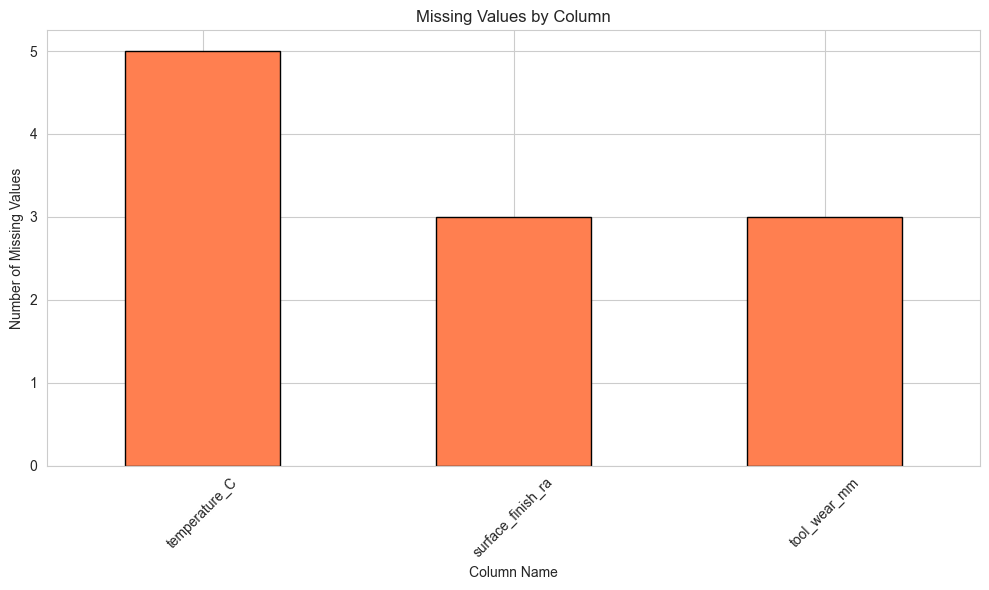

In [109]:
# Visualize missing values
plt.figure(figsize=(10, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

missing_data.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Missing Values by Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Strategy 1: Complete Removal

Remove all rows that have any missing values. 

**Use when**: Missing data is minimal and random.

In [110]:
# Strategy 1: Complete removal
df_strategy1 = df.dropna()

print(f"Original dataset: {df.shape[0]} rows")
print(f"After removing all missing values: {df_strategy1.shape[0]} rows")
print(f"Rows removed: {df.shape[0] - df_strategy1.shape[0]} ({((df.shape[0] - df_strategy1.shape[0]) / df.shape[0] * 100):.2f}%)")

Original dataset: 64 rows
After removing all missing values: 53 rows
Rows removed: 11 (17.19%)


#### Strategy 2: Threshold-Based Removal

Remove columns where more than a certain percentage of values are missing.

**Use when**: Some columns have too many missing values to be useful.

In [111]:
# Strategy 2: Threshold-based removal (drop columns with >30% missing)
threshold = 0.30
df_strategy2 = df.copy()

# Calculate percentage of missing values per column
missing_percentages = df_strategy2.isnull().sum() / len(df_strategy2)

# Identify columns to drop
cols_to_drop = missing_percentages[missing_percentages > threshold].index.tolist()

print(f"Columns with >{threshold*100}% missing values: {cols_to_drop}")

if cols_to_drop:
    df_strategy2 = df_strategy2.drop(columns=cols_to_drop)
    print(f"\nDropped {len(cols_to_drop)} column(s)")
else:
    print(f"\nNo columns exceed the {threshold*100}% missing threshold")

print(f"\nOriginal columns: {df.shape[1]}")
print(f"Remaining columns: {df_strategy2.shape[1]}")

Columns with >30.0% missing values: []

No columns exceed the 30.0% missing threshold

Original columns: 12
Remaining columns: 12


#### Strategy 3: Imputation

Fill missing values with statistical measures or forward/backward fill.

**Use when**: We want to preserve all data and missing values are moderate.

In [112]:
# Strategy 3: Imputation
df_strategy3 = df.copy()

# For numerical columns: fill with median (robust to outliers)
numerical_cols_with_missing = df_strategy3.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols_with_missing:
    if df_strategy3[col].isnull().sum() > 0:
        median_value = df_strategy3[col].median()
        # Use the recommended approach: assign back to the column
        df_strategy3[col] = df_strategy3[col].fillna(median_value)
        print(f"Filled {col} with median: {median_value:.2f}")

# For categorical columns: fill with mode (most frequent value)
categorical_cols_with_missing = df_strategy3.select_dtypes(include=['object']).columns

for col in categorical_cols_with_missing:
    if df_strategy3[col].isnull().sum() > 0:
        mode_value = df_strategy3[col].mode()[0]
        # Use the recommended approach: assign back to the column
        df_strategy3[col] = df_strategy3[col].fillna(mode_value)
        print(f"Filled {col} with mode: {mode_value}")

print(f"\nMissing values after imputation: {df_strategy3.isnull().sum().sum()}")

Filled surface_finish_ra with median: 1.10
Filled tool_wear_mm with median: 0.10
Filled temperature_C with median: 25.30

Missing values after imputation: 0


In [113]:
# Compare strategies
print("Comparison of Missing Value Strategies:")
print(f"{'Strategy':<30} {'Rows':<10} {'Columns':<10} {'Missing Values':<15}")
print("="*65)
print(f"{'Original':<30} {df.shape[0]:<10} {df.shape[1]:<10} {df.isnull().sum().sum():<15}")
print(f"{'Strategy 1 (Complete removal)':<30} {df_strategy1.shape[0]:<10} {df_strategy1.shape[1]:<10} {df_strategy1.isnull().sum().sum():<15}")
print(f"{'Strategy 2 (Threshold-based)':<30} {df_strategy2.shape[0]:<10} {df_strategy2.shape[1]:<10} {df_strategy2.isnull().sum().sum():<15}")
print(f"{'Strategy 3 (Imputation)':<30} {df_strategy3.shape[0]:<10} {df_strategy3.shape[1]:<10} {df_strategy3.isnull().sum().sum():<15}")

Comparison of Missing Value Strategies:
Strategy                       Rows       Columns    Missing Values 
Original                       64         12         11             
Strategy 1 (Complete removal)  53         12         0              
Strategy 2 (Threshold-based)   64         12         11             
Strategy 3 (Imputation)        64         12         0              


In [114]:
# For this analysis, we'll use Strategy 3 (Imputation) to preserve maximum data
df_clean = df_strategy3.copy()
print(f"Working dataset shape: {df_clean.shape}")

Working dataset shape: (64, 12)


### 2.2 Handling Outliers

Outliers can significantly affect analysis. We'll use the **IQR (Interquartile Range) method** to detect and handle them.

**Two strategies**:
1. **Remove outliers** - Delete rows with outlier values
2. **Cap outliers (Winsorization)** - Replace outliers with boundary values

In [115]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Check for outliers in key numerical columns
numerical_cols = ['cutting_speed_m_min', 'tool_wear_mm', 'cycle_time_sec', 'temperature_C']

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f"\n{col}:")
    print(f"  Outliers found: {len(outliers)}")
    print(f"  Lower bound: {lower:.2f}")
    print(f"  Upper bound: {upper:.2f}")
    if len(outliers) > 0:
        print(f"  Outlier values: {outliers[col].values}")


cutting_speed_m_min:
  Outliers found: 0
  Lower bound: -74.25
  Upper bound: 447.75

tool_wear_mm:
  Outliers found: 1
  Lower bound: 0.00
  Upper bound: 0.21
  Outlier values: [0.35]

cycle_time_sec:
  Outliers found: 0
  Lower bound: 28.50
  Upper bound: 56.50

temperature_C:
  Outliers found: 0
  Lower bound: 19.86
  Upper bound: 30.36


#### Outlier Strategy 1: Remove Outliers

In [116]:
# Strategy 1: Remove outliers from cutting_speed and tool_wear
df_no_outliers = df_clean.copy()

cols_to_check = ['cutting_speed_m_min', 'tool_wear_mm']
rows_before = len(df_no_outliers)

for col in cols_to_check:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower_bound) & 
        (df_no_outliers[col] <= upper_bound)
    ]

rows_after = len(df_no_outliers)
print(f"Rows before outlier removal: {rows_before}")
print(f"Rows after outlier removal: {rows_after}")
print(f"Rows removed: {rows_before - rows_after}")

Rows before outlier removal: 64
Rows after outlier removal: 63
Rows removed: 1


#### Outlier Strategy 2: Cap Outliers (Winsorization)

In [117]:
# Strategy 2: Cap outliers (Winsorization)
df_capped = df_clean.copy()

for col in cols_to_check:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"{col}: Capped between {lower_bound:.2f} and {upper_bound:.2f}")

print(f"\nAll rows preserved: {len(df_capped)} rows")

cutting_speed_m_min: Capped between -74.25 and 447.75
tool_wear_mm: Capped between 0.00 and 0.21

All rows preserved: 64 rows


In [118]:
# For this analysis, we'll use the capped version to preserve data
df_clean = df_capped.copy()

### 2.3 Data Cleaning

Fix inconsistent categorical values and remove duplicates.

In [119]:
# Check for inconsistent categorical values
print("Current unique values in 'material':")
print(df_clean['material'].unique())

# Clean material column: strip whitespace and standardize capitalization
df_clean['material'] = df_clean['material'].str.strip().str.title()

print("\nAfter cleaning:")
print(df_clean['material'].unique())

Current unique values in 'material':
['Steel' 'Aluminum' 'steel' 'aluminum' ' Steel' ' Steel ']

After cleaning:
['Steel' 'Aluminum']


In [120]:
# Remove duplicate rows
print(f"Duplicates before removal: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"Duplicates after removal: {df_clean.duplicated().sum()}")
print(f"\nFinal dataset shape: {df_clean.shape}")

Duplicates before removal: 1
Duplicates after removal: 0

Final dataset shape: (63, 12)


### 2.4 Feature Engineering

Create new features that might be useful for analysis.

#### Creating Derived Features

We can create new features based on domain knowledge.

In [121]:
# Create derived features

# 1. Material Removal Rate (MRR) - a key machining efficiency metric
# MRR = cutting_speed × feed_rate × depth_of_cut
df_clean['material_removal_rate'] = (
    df_clean['cutting_speed_m_min'] * 
    df_clean['feed_rate_mm_rev'] * 
    df_clean['depth_of_cut_mm']
)

# 2. Tool wear rate (wear per minute of cycle time)
df_clean['tool_wear_rate'] = (
    df_clean['tool_wear_mm'] / (df_clean['cycle_time_sec'] / 60)
)

# 3. Efficiency score (lower is better: combines cycle time and surface finish)
df_clean['efficiency_score'] = (
    df_clean['cycle_time_sec'] * df_clean['surface_finish_ra']
)

print("New features created:")
print(df_clean[['material_removal_rate', 'tool_wear_rate', 'efficiency_score']].describe())

New features created:
       material_removal_rate  tool_wear_rate  efficiency_score
count                  63.00           63.00             63.00
mean                   83.93            0.15             52.21
std                    59.41            0.03             23.53
min                    12.01            0.09             20.40
25%                    38.00            0.13             35.55
50%                    63.95            0.15             46.20
75%                   129.44            0.17             59.80
max                   207.41            0.24            115.50


#### Creating Categorical Variables from Numerical Variables

We can bin numerical variables into categories for easier analysis.

In [122]:
# Method 1: pd.cut() - equal-width bins
# Categorize cycle time into Low, Medium, High
df_clean['cycle_time_category'] = pd.cut(
    df_clean['cycle_time_sec'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

print("Cycle Time Categories (equal-width bins):")
print(df_clean['cycle_time_category'].value_counts().sort_index())

Cycle Time Categories (equal-width bins):
cycle_time_category
Low       28
Medium    24
High      11
Name: count, dtype: int64


In [123]:
# Method 2: pd.qcut() - equal-frequency bins (quantiles)
# Categorize tool wear into quartiles
df_clean['tool_wear_quartile'] = pd.qcut(
    df_clean['tool_wear_mm'],
    q=4,
    labels=['Q1-Low', 'Q2-Medium-Low', 'Q3-Medium-High', 'Q4-High']
)

print("\nTool Wear Quartiles (equal-frequency bins):")
print(df_clean['tool_wear_quartile'].value_counts().sort_index())


Tool Wear Quartiles (equal-frequency bins):
tool_wear_quartile
Q1-Low            18
Q2-Medium-Low     17
Q3-Medium-High    14
Q4-High           14
Name: count, dtype: int64


In [124]:
# Method 3: Custom bins based on domain knowledge
# Categorize temperature into comfort zones
df_clean['temperature_zone'] = pd.cut(
    df_clean['temperature_C'],
    bins=[0, 23, 26, 100],
    labels=['Cool', 'Optimal', 'Warm']
)

print("\nTemperature Zones (custom bins):")
print(df_clean['temperature_zone'].value_counts().sort_index())


Temperature Zones (custom bins):
temperature_zone
Cool        6
Optimal    36
Warm       21
Name: count, dtype: int64


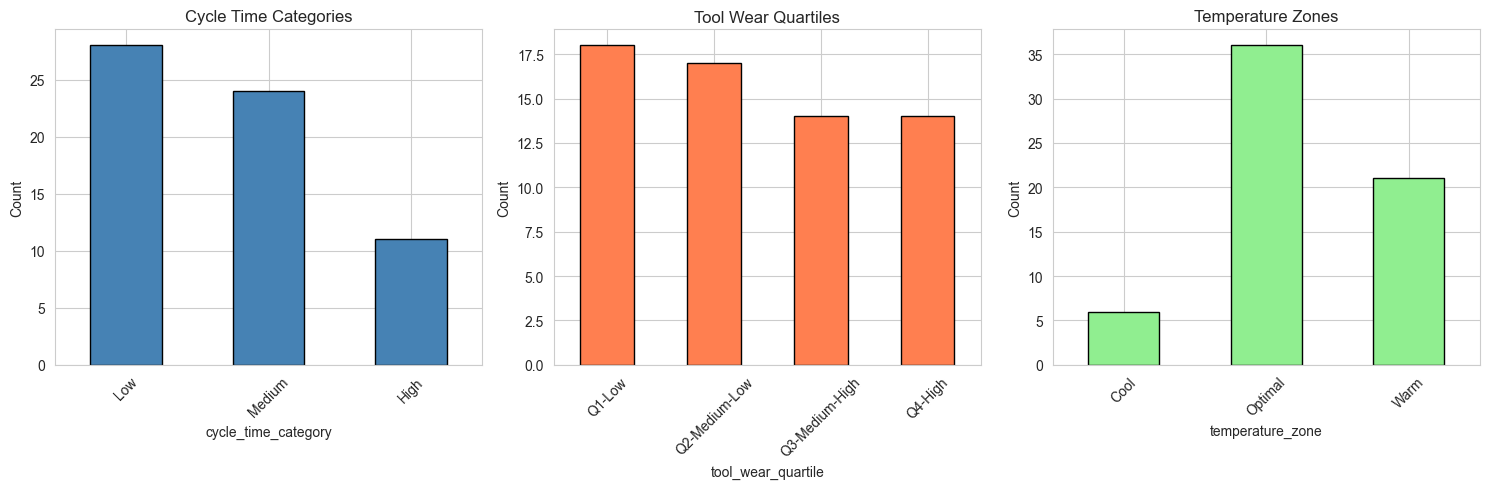

In [125]:
# Visualize the binned categories
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df_clean['cycle_time_category'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='steelblue', edgecolor='black'
)
axes[0].set_title('Cycle Time Categories')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

df_clean['tool_wear_quartile'].value_counts().sort_index().plot(
    kind='bar', ax=axes[1], color='coral', edgecolor='black'
)
axes[1].set_title('Tool Wear Quartiles')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

df_clean['temperature_zone'].value_counts().sort_index().plot(
    kind='bar', ax=axes[2], color='lightgreen', edgecolor='black'
)
axes[2].set_title('Temperature Zones')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.5 Data Preparation Summary

**What we accomplished**:
- ✅ Handled missing values using imputation
- ✅ Detected and capped outliers
- ✅ Cleaned inconsistent categorical values
- ✅ Removed duplicate rows
- ✅ Created 3 derived numerical features
- ✅ Created 3 new categorical features through binning

**Dataset is now ready for modeling!**

In [126]:
# Final cleaned dataset overview
print("Clean Dataset Summary:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Duplicates: {df_clean.duplicated().sum()}")
print(f"\nColumns: {df_clean.columns.tolist()}")

Clean Dataset Summary:
Shape: (63, 18)
Missing values: 0
Duplicates: 0

Columns: ['run_id', 'machine_id', 'material', 'tool_type', 'cutting_speed_m_min', 'feed_rate_mm_rev', 'depth_of_cut_mm', 'surface_finish_ra', 'tool_wear_mm', 'cycle_time_sec', 'operator', 'temperature_C', 'material_removal_rate', 'tool_wear_rate', 'efficiency_score', 'cycle_time_category', 'tool_wear_quartile', 'temperature_zone']


---

## 3. Data Modeling (Basic Analysis)

**Goal**: Understand relationships and patterns in the cleaned data.

In this phase, we'll:
- Analyze correlations between variables
- Perform grouped analysis to compare categories

### 3.1 Correlation Analysis

Correlation measures the strength and direction of linear relationships between numerical variables.

**Correlation coefficient (r)**:
- Range: -1 to +1
- **r > 0**: Positive correlation (variables move together)
- **r < 0**: Negative correlation (variables move opposite)
- **|r| > 0.7**: Strong correlation
- **|r| < 0.3**: Weak correlation

In [127]:
# Calculate correlation matrix
numerical_features = df_clean.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_clean[numerical_features].corr()

print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,cutting_speed_m_min,feed_rate_mm_rev,depth_of_cut_mm,surface_finish_ra,tool_wear_mm,cycle_time_sec,temperature_C,material_removal_rate,tool_wear_rate,efficiency_score
cutting_speed_m_min,1.00,0.89,0.88,-0.84,-0.83,-0.90,0.34,0.94,-0.74,-0.85
feed_rate_mm_rev,0.89,1.00,0.88,-0.81,-0.81,-0.90,0.28,0.95,-0.73,-0.82
depth_of_cut_mm,0.88,0.88,1.00,-0.91,-0.89,-0.95,0.31,0.92,-0.81,-0.91
surface_finish_ra,-0.84,-0.81,-0.91,1.00,0.93,0.97,-0.26,-0.79,0.84,1.00
tool_wear_mm,-0.83,-0.81,-0.89,0.93,1.00,0.94,-0.42,-0.82,0.97,0.93
cycle_time_sec,-0.90,-0.90,-0.95,0.97,0.94,1.00,-0.35,-0.89,0.85,0.98
temperature_C,0.34,0.28,0.31,-0.26,-0.42,-0.35,1.00,0.38,-0.47,-0.27
material_removal_rate,0.94,0.95,0.92,-0.79,-0.82,-0.89,0.38,1.00,-0.76,-0.79
tool_wear_rate,-0.74,-0.73,-0.81,0.84,0.97,0.85,-0.47,-0.76,1.00,0.83
efficiency_score,-0.85,-0.82,-0.91,1.00,0.93,0.98,-0.27,-0.79,0.83,1.00


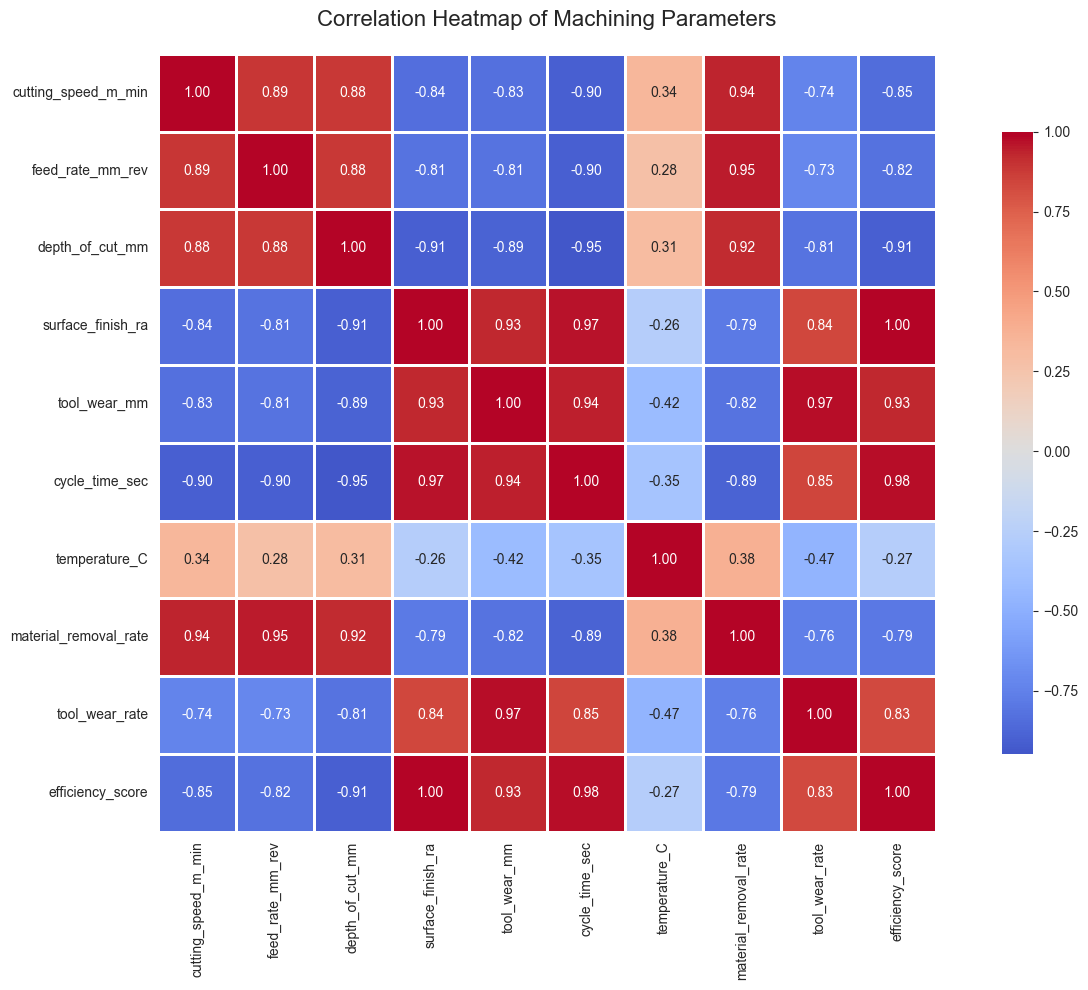

In [128]:
# Visualize correlation matrix with heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Heatmap of Machining Parameters', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [129]:
# Identify strong correlations (|r| > 0.7)
print("Strong Correlations (|r| > 0.7):")
print("="*60)

# Get upper triangle of correlation matrix to avoid duplicates
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find strong correlations
strong_correlations = []
for column in upper_triangle.columns:
    for index in upper_triangle.index:
        correlation = upper_triangle.loc[index, column]
        if abs(correlation) > 0.7:
            strong_correlations.append({
                'Variable 1': index,
                'Variable 2': column,
                'Correlation': correlation
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    strong_corr_df = strong_corr_df.sort_values('Correlation', key=abs, ascending=False)
    print(strong_corr_df.to_string(index=False))
else:
    print("No strong correlations found.")

Strong Correlations (|r| > 0.7):
           Variable 1            Variable 2  Correlation
    surface_finish_ra      efficiency_score         1.00
       cycle_time_sec      efficiency_score         0.98
         tool_wear_mm        tool_wear_rate         0.97
    surface_finish_ra        cycle_time_sec         0.97
     feed_rate_mm_rev material_removal_rate         0.95
      depth_of_cut_mm        cycle_time_sec        -0.95
         tool_wear_mm        cycle_time_sec         0.94
  cutting_speed_m_min material_removal_rate         0.94
    surface_finish_ra          tool_wear_mm         0.93
         tool_wear_mm      efficiency_score         0.93
      depth_of_cut_mm material_removal_rate         0.92
      depth_of_cut_mm      efficiency_score        -0.91
      depth_of_cut_mm     surface_finish_ra        -0.91
  cutting_speed_m_min        cycle_time_sec        -0.90
     feed_rate_mm_rev        cycle_time_sec        -0.90
       cycle_time_sec material_removal_rate        -0.8

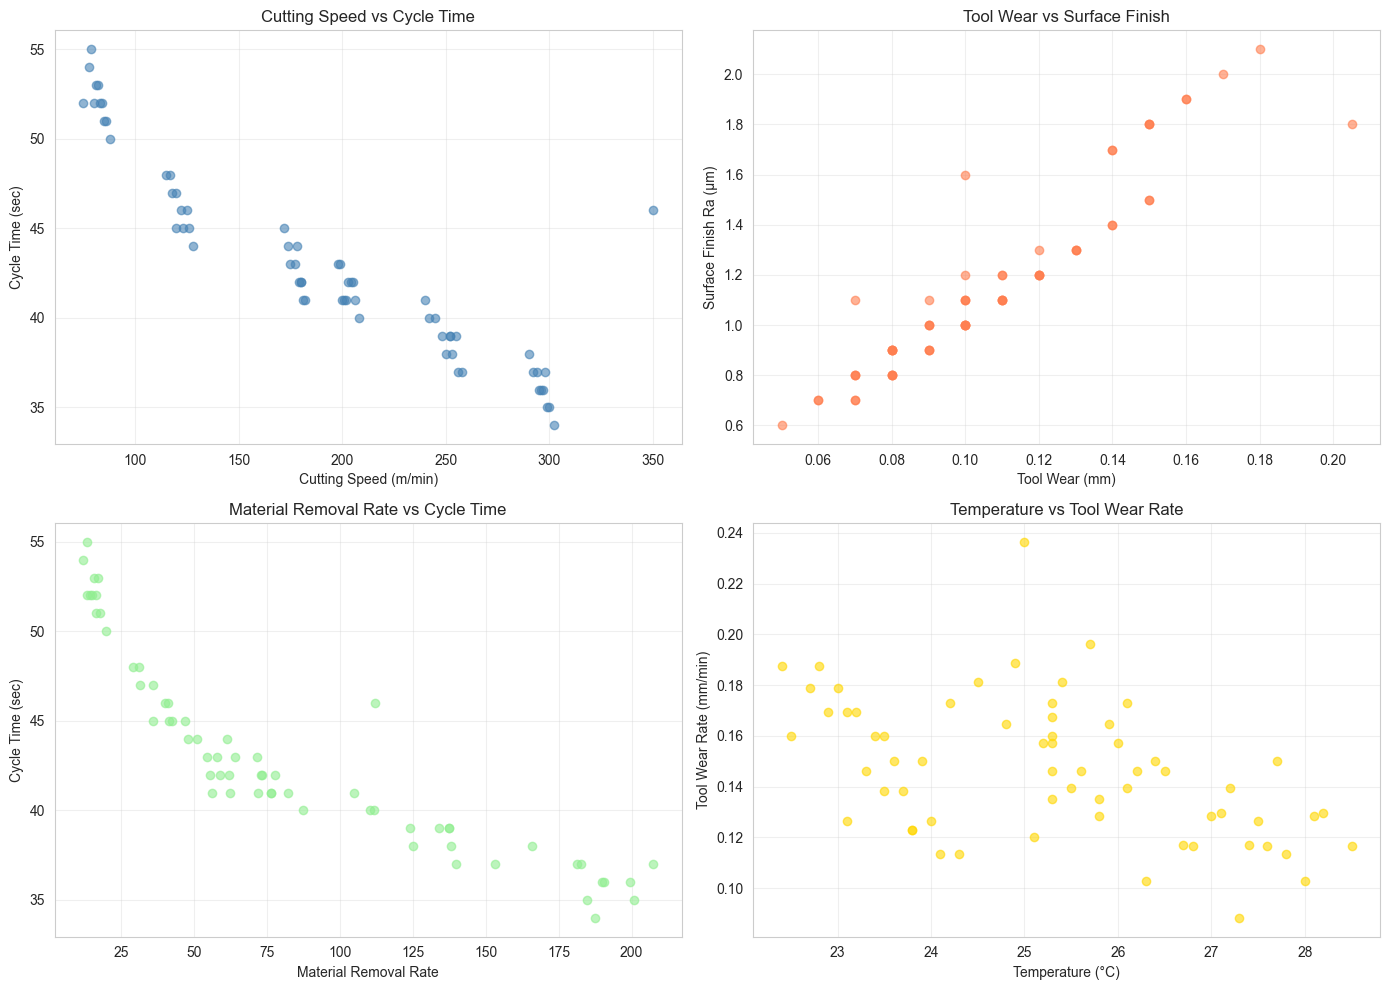

In [130]:
# Visualize key relationships with scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Cutting speed vs Cycle time
axes[0, 0].scatter(df_clean['cutting_speed_m_min'], df_clean['cycle_time_sec'], 
                   alpha=0.6, color='steelblue')
axes[0, 0].set_xlabel('Cutting Speed (m/min)')
axes[0, 0].set_ylabel('Cycle Time (sec)')
axes[0, 0].set_title('Cutting Speed vs Cycle Time')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Tool wear vs Surface finish
axes[0, 1].scatter(df_clean['tool_wear_mm'], df_clean['surface_finish_ra'], 
                   alpha=0.6, color='coral')
axes[0, 1].set_xlabel('Tool Wear (mm)')
axes[0, 1].set_ylabel('Surface Finish Ra (μm)')
axes[0, 1].set_title('Tool Wear vs Surface Finish')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Material removal rate vs Cycle time
axes[1, 0].scatter(df_clean['material_removal_rate'], df_clean['cycle_time_sec'], 
                   alpha=0.6, color='lightgreen')
axes[1, 0].set_xlabel('Material Removal Rate')
axes[1, 0].set_ylabel('Cycle Time (sec)')
axes[1, 0].set_title('Material Removal Rate vs Cycle Time')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Temperature vs Tool wear rate
axes[1, 1].scatter(df_clean['temperature_C'], df_clean['tool_wear_rate'], 
                   alpha=0.6, color='gold')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Tool Wear Rate (mm/min)')
axes[1, 1].set_title('Temperature vs Tool Wear Rate')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Grouped Analysis

Compare performance metrics across different categories to identify patterns.

In [131]:
# Group by material and calculate summary statistics
material_summary = df_clean.groupby('material').agg({
    'cycle_time_sec': ['mean', 'std', 'min', 'max'],
    'tool_wear_mm': ['mean', 'std'],
    'surface_finish_ra': ['mean', 'std'],
    'material_removal_rate': ['mean', 'std'],
    'efficiency_score': ['mean', 'std'],
    'run_id': 'count'
}).round(2)

material_summary.columns = ['_'.join(col).strip() for col in material_summary.columns.values]
material_summary = material_summary.rename(columns={'run_id_count': 'count'})

print("Summary Statistics by Material:")
print(material_summary)

Summary Statistics by Material:
          cycle_time_sec_mean  cycle_time_sec_std  cycle_time_sec_min  \
material                                                                
Aluminum                38.84                2.50                  34   
Steel                   47.16                4.22                  41   

          cycle_time_sec_max  tool_wear_mm_mean  tool_wear_mm_std  \
material                                                            
Aluminum                  43               0.09              0.02   
Steel                     55               0.13              0.03   

          surface_finish_ra_mean  surface_finish_ra_std  \
material                                                  
Aluminum                    0.92                   0.16   
Steel                       1.41                   0.35   

          material_removal_rate_mean  material_removal_rate_std  \
material                                                          
Aluminum                   

In [132]:
# Group by tool type
tool_summary = df_clean.groupby('tool_type').agg({
    'cycle_time_sec': ['mean', 'std'],
    'tool_wear_mm': ['mean', 'std'],
    'surface_finish_ra': ['mean', 'std'],
    'efficiency_score': ['mean', 'std'],
    'run_id': 'count'
}).round(2)

tool_summary.columns = ['_'.join(col).strip() for col in tool_summary.columns.values]
tool_summary = tool_summary.rename(columns={'run_id_count': 'count'})

print("\nSummary Statistics by Tool Type:")
print(tool_summary)


Summary Statistics by Tool Type:
           cycle_time_sec_mean  cycle_time_sec_std  tool_wear_mm_mean  \
tool_type                                                               
Carbide                  42.45                3.92               0.11   
Ceramic                  39.40                3.60               0.08   
HSS                      47.19                5.59               0.13   

           tool_wear_mm_std  surface_finish_ra_mean  surface_finish_ra_std  \
tool_type                                                                    
Carbide                0.03                    1.09                   0.26   
Ceramic                0.02                    0.94                   0.18   
HSS                    0.03                    1.47                   0.41   

           efficiency_score_mean  efficiency_score_std  count  
tool_type                                                      
Carbide                    47.06                 15.28     22  
Ceramic          

In [133]:
# Multi-level grouping: Material + Tool Type
multi_summary = df_clean.groupby(['material', 'tool_type']).agg({
    'cycle_time_sec': 'mean',
    'tool_wear_mm': 'mean',
    'surface_finish_ra': 'mean',
    'efficiency_score': 'mean',
    'run_id': 'count'
}).round(2)

multi_summary = multi_summary.rename(columns={'run_id': 'count'})

print("\nSummary Statistics by Material and Tool Type:")
print(multi_summary)


Summary Statistics by Material and Tool Type:
                    cycle_time_sec  tool_wear_mm  surface_finish_ra  \
material tool_type                                                    
Aluminum Carbide             38.82          0.08               0.86   
         Ceramic             36.10          0.07               0.82   
         HSS                 41.60          0.10               1.07   
Steel    Carbide             46.09          0.13               1.31   
         Ceramic             42.70          0.10               1.07   
         HSS                 52.27          0.16               1.83   

                    efficiency_score  count  
material tool_type                           
Aluminum Carbide               33.64     11  
         Ceramic               29.70     10  
         HSS                   44.59     10  
Steel    Carbide               60.49     11  
         Ceramic               45.85     10  
         HSS                   95.70     11  


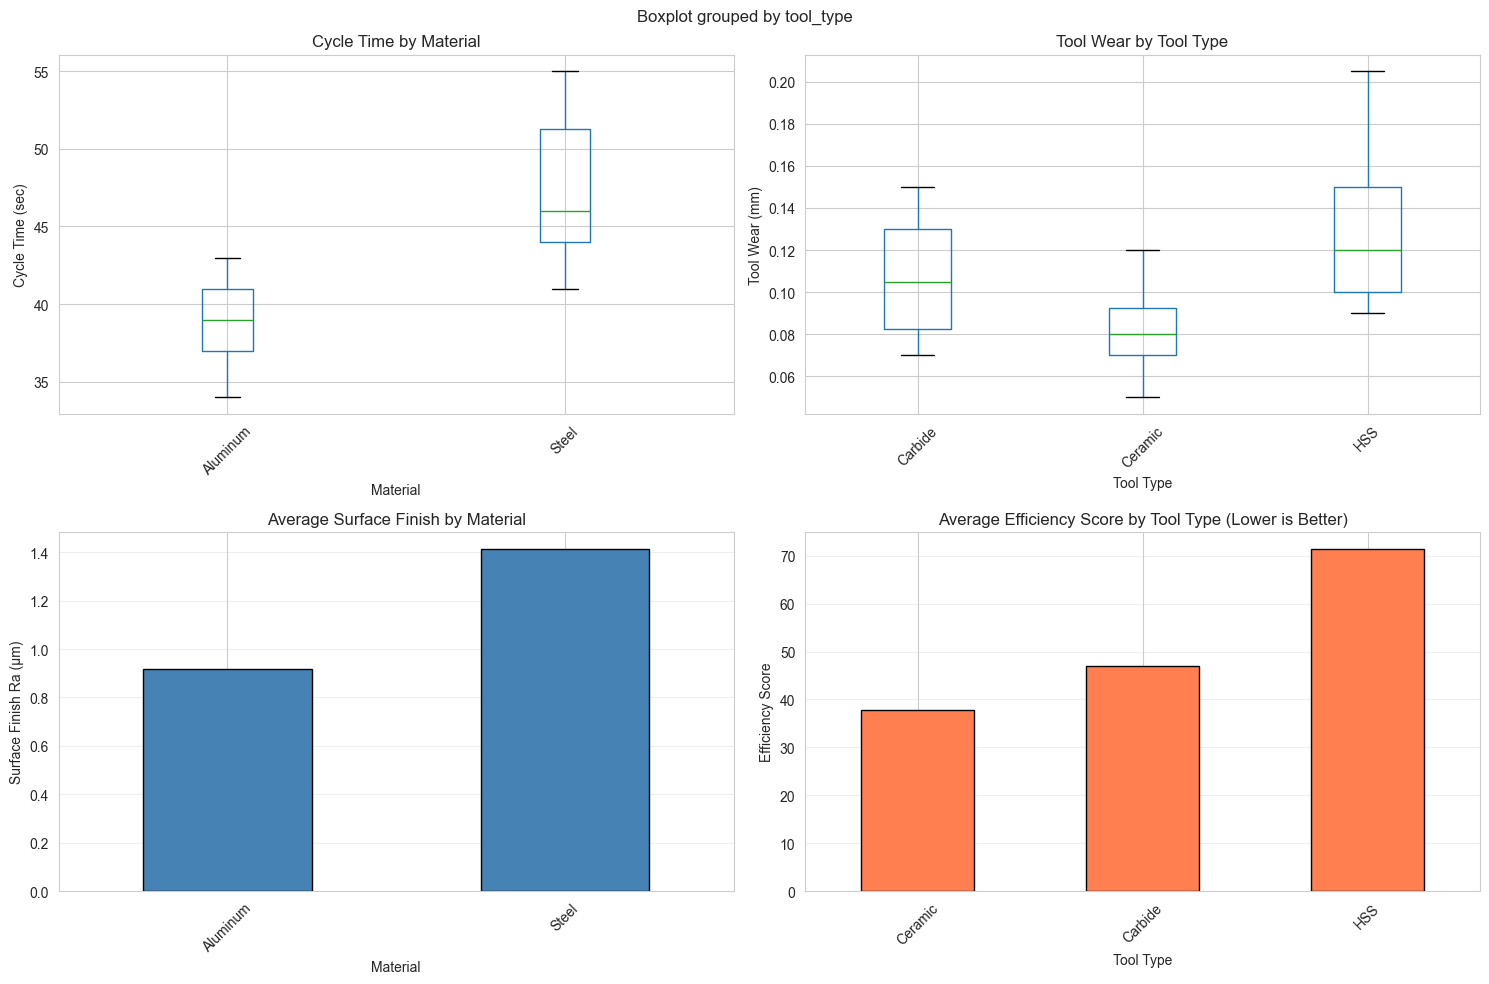

In [134]:
# Visualize grouped comparisons
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Cycle time by material
df_clean.boxplot(column='cycle_time_sec', by='material', ax=axes[0, 0])
axes[0, 0].set_title('Cycle Time by Material')
axes[0, 0].set_xlabel('Material')
axes[0, 0].set_ylabel('Cycle Time (sec)')
plt.sca(axes[0, 0])
plt.xticks(rotation=45)

# Plot 2: Tool wear by tool type
df_clean.boxplot(column='tool_wear_mm', by='tool_type', ax=axes[0, 1])
axes[0, 1].set_title('Tool Wear by Tool Type')
axes[0, 1].set_xlabel('Tool Type')
axes[0, 1].set_ylabel('Tool Wear (mm)')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Plot 3: Surface finish by material
material_finish = df_clean.groupby('material')['surface_finish_ra'].mean().sort_values()
material_finish.plot(kind='bar', ax=axes[1, 0], color='steelblue', edgecolor='black')
axes[1, 0].set_title('Average Surface Finish by Material')
axes[1, 0].set_xlabel('Material')
axes[1, 0].set_ylabel('Surface Finish Ra (μm)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Efficiency score by tool type
tool_efficiency = df_clean.groupby('tool_type')['efficiency_score'].mean().sort_values()
tool_efficiency.plot(kind='bar', ax=axes[1, 1], color='coral', edgecolor='black')
axes[1, 1].set_title('Average Efficiency Score by Tool Type (Lower is Better)')
axes[1, 1].set_xlabel('Tool Type')
axes[1, 1].set_ylabel('Efficiency Score')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---

## Conclusion

In this notebook, we completed a full EDA workflow following **CRISP-DM methodology**:

### 1. Data Understanding
- Explored dataset structure and dimensions
- Analyzed distributions of numerical and categorical variables
- Identified data quality issues (missing values, duplicates, outliers)
- Used visualizations to understand data patterns

### 2. Data Preparation
- Handled missing values using three strategies
- Detected and managed outliers
- Cleaned inconsistent categorical data
- Engineered new features for analysis
- Created categorical variables through binning

### 3. Data Modeling (Basic Analysis)
- Analyzed correlations between variables
- Performed grouped analysis to compare categories
- Identified key patterns and relationships

**Next Steps**: With clean, well-understood data, we're ready for:
- Advanced statistical modeling
- Predictive analytics
- Machine learning applications
- Process optimization